In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
long_pose_df = pd.read_csv("long_pose_data.csv")
pose_df = pd.read_csv("pose_data.csv")

In [3]:
long_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158329 entries, 0 to 1158328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   video_name  1158329 non-null  object 
 1   frame_id    1158329 non-null  int64  
 2   person_id   1158329 non-null  int64  
 3   joint_id    1158329 non-null  int64  
 4   x           1158329 non-null  float64
 5   y           1158329 non-null  float64
 6   score       1158329 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 61.9+ MB


In [4]:
long_pose_df['video_name'].unique()

array(['Mek_Khara_Lor_Kaew', 'Kum_Pa_Gun_Poong_Hork', 'Narai_Kwang_Jug',
       'Hoang_Hearn', 'Phra_Ram_Phang_Sorn', 'Tad_Mai_Khom_Nam'],
      dtype=object)

In [5]:
long_pose_df[(long_pose_df['joint_id'] == 0) & (long_pose_df['frame_id'] == 0)].head(5)

,video_name,frame_id,person_id,joint_id,x,y,score
0,Mek_Khara_Lor_Kaew,0,0,0,1567.591797,627.675171,0.972176
17,Mek_Khara_Lor_Kaew,0,1,0,1391.905762,543.111145,0.937483
34,Mek_Khara_Lor_Kaew,0,2,0,1113.604370,527.773926,0.972630
51,Mek_Khara_Lor_Kaew,0,3,0,916.872925,562.146851,0.990748
68,Mek_Khara_Lor_Kaew,0,4,0,1214.449951,631.646118,0.970992


In [6]:
pose_df[(pose_df['joint_id'] == 0) & (pose_df['frame_id'] == 0)].head(5)

,video_name,frame_id,person_id,joint_id,x,y,score
0,Mek_Khara_Lor_Kaew,0,0,0,1567.591797,627.675171,0.972176
17,Mek_Khara_Lor_Kaew,0,1,0,1391.905762,543.111145,0.937483
34,Mek_Khara_Lor_Kaew,0,2,0,1113.604370,527.773926,0.972630
51,Mek_Khara_Lor_Kaew,0,3,0,916.872925,562.146851,0.990748
68,Mek_Khara_Lor_Kaew,0,4,0,1214.449951,631.646118,0.970992


In [7]:
diff = pose_df.merge(
    long_pose_df,
    how="outer",
    indicator=True
)

diff["_merge"].value_counts()


_merge
right_only    594235
both          564094
left_only          0
Name: count, dtype: int64

In [8]:
right_only = diff[diff["_merge"] == "right_only"]
right_only

,video_name,frame_id,person_id,joint_id,x,y,score,_merge
513333,Tad_Mai_Khom_Nam,0,0,0,1567.591797,627.675171,0.972176,right_only
513335,Tad_Mai_Khom_Nam,0,0,1,1574.658691,620.556152,0.967867,right_only
513337,Tad_Mai_Khom_Nam,0,0,2,1564.053589,620.256836,0.765548,right_only
513339,Tad_Mai_Khom_Nam,0,0,3,1592.332397,623.721985,0.946861,right_only
513341,Tad_Mai_Khom_Nam,0,0,4,1563.698364,623.566528,0.185544,right_only
...,...,...,...,...,...,...,...,...
1158324,Tad_Mai_Khom_Nam,3865,8,12,1314.278442,637.115417,0.997412,right_only
1158325,Tad_Mai_Khom_Nam,3865,8,13,1338.024658,699.528564,0.994785,right_only
1158326,Tad_Mai_Khom_Nam,3865,8,14,1312.129639,698.582275,0.994782,right_only
1158327,Tad_Mai_Khom_Nam,3865,8,15,1332.965332,760.850952,0.980559,right_only


In [9]:
right_only['video_name'].unique()

array(['Tad_Mai_Khom_Nam'], dtype=object)

In [10]:
pose_df[pose_df['video_name'] == 'Tad_Mai_Khom_Nam']

,video_name,frame_id,person_id,joint_id,x,y,score
513332,Tad_Mai_Khom_Nam,0,0,0,1519.165039,625.070190,0.922287
513333,Tad_Mai_Khom_Nam,0,0,1,1524.894531,619.533203,0.848975
513334,Tad_Mai_Khom_Nam,0,0,2,1514.144653,618.879028,0.659072
513335,Tad_Mai_Khom_Nam,0,0,3,1537.331177,619.995300,0.802717
513336,Tad_Mai_Khom_Nam,0,0,4,1507.785034,617.818848,0.315646
...,...,...,...,...,...,...,...
564089,Tad_Mai_Khom_Nam,331,8,12,760.861694,625.476807,0.994699
564090,Tad_Mai_Khom_Nam,331,8,13,807.006226,683.710205,0.988806
564091,Tad_Mai_Khom_Nam,331,8,14,750.899902,684.247498,0.987945
564092,Tad_Mai_Khom_Nam,331,8,15,816.033691,740.247253,0.969000


In [11]:
long_pose_df[long_pose_df['video_name'] == 'Tad_Mai_Khom_Nam']

,video_name,frame_id,person_id,joint_id,x,y,score
513332,Tad_Mai_Khom_Nam,0,0,0,1519.165039,625.070190,0.922287
513333,Tad_Mai_Khom_Nam,0,0,1,1524.894531,619.533203,0.848975
513334,Tad_Mai_Khom_Nam,0,0,2,1514.144653,618.879028,0.659072
513335,Tad_Mai_Khom_Nam,0,0,3,1537.331177,619.995300,0.802717
513336,Tad_Mai_Khom_Nam,0,0,4,1507.785034,617.818848,0.315646
...,...,...,...,...,...,...,...
1158324,Tad_Mai_Khom_Nam,3865,8,12,1314.278442,637.115417,0.997412
1158325,Tad_Mai_Khom_Nam,3865,8,13,1338.024658,699.528564,0.994785
1158326,Tad_Mai_Khom_Nam,3865,8,14,1312.129639,698.582275,0.994782
1158327,Tad_Mai_Khom_Nam,3865,8,15,1332.965332,760.850952,0.980559


เพราะว่า video มีส่วนท้ายที่ไม่ใช่ท่ามวยอยู่จึงถูกตัดออกตอน split clip เป็นแต่ละท่า

In [12]:
track_df = pd.read_csv("track_data.csv")

In [13]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35135 entries, 0 to 35134
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   frame     35135 non-null  int64
 1   track_id  35135 non-null  int64
 2   x1        35135 non-null  int64
 3   y1        35135 non-null  int64
 4   x2        35135 non-null  int64
 5   y2        35135 non-null  int64
 6   cx        35135 non-null  int64
 7   cy        35135 non-null  int64
dtypes: int64(8)
memory usage: 2.1 MB


In [14]:
track_df.head()

,frame,track_id,x1,y1,x2,y2,cx,cy
0,0,1,1080,501,1174,807,1127,654
1,0,2,1504,588,1650,977,1577,782
2,0,3,733,512,804,797,768,654
3,0,4,879,536,986,881,932,708
4,0,5,657,582,746,974,701,778


In [15]:
pose_df['frame_id'].nunique()

811

In [16]:
track_df['frame'].nunique()

3866

In [17]:
long_pose_df['frame_id'].nunique()

3866

In [18]:
track_len = (
    pose_df.groupby("person_id")["frame_id"]
      .nunique()
      .sort_values(ascending=False)
)

track_len

person_id
0     811
1     811
2     811
3     811
4     811
5     811
6     811
7     811
8     811
9     146
10     10
Name: frame_id, dtype: int64

In [19]:
track_len = (
    track_df.groupby("track_id")["frame"]
      .nunique()
      .sort_values(ascending=False)
)

track_len

track_id
1      3866
5      3866
4      3866
8      3866
2      3865
       ... 
181       1
186       1
138       1
241       1
291       1
Name: frame, Length: 63, dtype: int64

In [20]:
def get_track_id_from_point(df_bbox, frame, x, y):
    hits = df_bbox[
        (df_bbox["frame"] == frame) &
        (df_bbox["x1"] <= x) & (x <= df_bbox["x2"]) &
        (df_bbox["y1"] <= y) & (y <= df_bbox["y2"])
    ]

    if hits.empty:
        return None

    # ถ้ามีหลาย bbox ซ้อน → เลือกอันที่เล็กสุด
    hits = hits.copy()
    hits["area"] = (hits["x2"] - hits["x1"]) * (hits["y2"] - hits["y1"])

    return int(hits.sort_values("area").iloc[0]["track_id"])


In [21]:
rows = []

for i in range(len(pose_df)):
    frame_id = pose_df['frame_id'].iloc[i]
    x = pose_df['x'].iloc[i]
    y = pose_df['y'].iloc[i]

    tracked_id = get_track_id_from_point(track_df, frame_id, x, y)
    posed_id = pose_df['person_id'].iloc[i]

    rows.append({
        "frame_id": frame_id,
        "x": x,
        "y": y,
        "tracked_id": tracked_id,
        "posed_id": posed_id
    })

check_df = pd.DataFrame(rows)
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564094 entries, 0 to 564093
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   frame_id    564094 non-null  int64  
 1   x           564094 non-null  float64
 2   y           564094 non-null  float64
 3   tracked_id  407611 non-null  float64
 4   posed_id    564094 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 21.5 MB


In [22]:
check_df.head()

,frame_id,x,y,tracked_id,posed_id
0,0,1567.591797,627.675171,2.0,0
1,0,1574.658691,620.556152,2.0,0
2,0,1564.053589,620.256836,2.0,0
3,0,1592.332397,623.721985,2.0,0
4,0,1563.698364,623.566528,2.0,0


In [23]:
check_df['tracked_id'] = check_df['tracked_id'].astype("Int64")
check_df.head()

,frame_id,x,y,tracked_id,posed_id
0,0,1567.591797,627.675171,2,0
1,0,1574.658691,620.556152,2,0
2,0,1564.053589,620.256836,2,0
3,0,1592.332397,623.721985,2,0
4,0,1563.698364,623.566528,2,0


In [24]:
len(check_df)

564094

In [25]:
check_df.to_csv("check_data.csv", index=False)

In [26]:
match_df = check_df[check_df['tracked_id'] == check_df['posed_id']]
match_df.head()

,frame_id,x,y,tracked_id,posed_id
85,0,680.915894,620.933655,5,5
86,0,687.967224,614.741760,5,5
87,0,677.380066,614.360962,5,5
88,0,705.578979,616.956421,5,5
89,0,678.577515,616.627136,5,5


In [27]:
match_df['tracked_id'].nunique()

9

In [28]:
match_df['frame_id'].nunique()

687

In [29]:
match_df.groupby('frame_id')['tracked_id'].unique()

frame_id
0      [5, 6, 3, 4, 7]
1               [5, 7]
2            [5, 4, 7]
3            [5, 4, 7]
4      [5, 3, 1, 4, 7]
            ...       
797             [1, 8]
798             [3, 7]
799             [3, 7]
800                [7]
801          [2, 3, 7]
Name: tracked_id, Length: 687, dtype: object

In [30]:
total_frames = match_df['frame_id'].nunique()

frames_per_id = (
    match_df
    .dropna(subset=['tracked_id'])
    .groupby('tracked_id')['frame_id']
    .nunique()
    .sort_values(ascending=False)
)

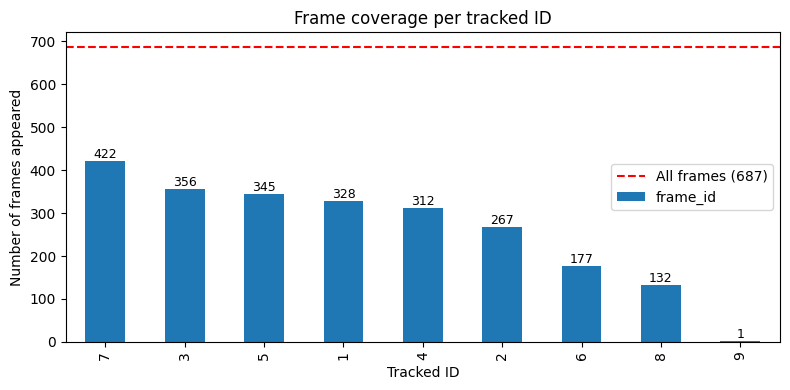

In [31]:
plt.figure(figsize=(8, 4))
ax = frames_per_id.plot(kind='bar')

# เส้น total frames
ax.axhline(
    y=total_frames,
    color='r',
    linestyle='--',
    label=f"All frames ({total_frames})"
)

# ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_ylabel("Number of frames appeared")
ax.set_xlabel("Tracked ID")
ax.set_title("Frame coverage per tracked ID")
ax.legend()
plt.tight_layout()
plt.show()